In [1]:
#importing dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading in the excel file into pandas
disaster_data=pd.read_excel('disaster-data/public_emdat_custom_request_updated.xlsx')
disaster_data


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,60.503579,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,58.840648,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,58.840648,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,16995.0,58.840648,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25
4,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,58.840648,"[{""adm1_code"":575,""adm1_name"":""Barisal""},{""adm...",2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,2023-0812-IND,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-28,2023-12-01
9809,2023-0815-AUS,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,AUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-30,2023-12-01
9810,2023-9167-HND,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,HND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{""adm1_code"":1420,""adm1_name"":""Atlantida""},{""...",2023-03-23,2023-09-26
9811,2023-9234-ESP,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,ESP,...,NaN,NaN,300000.0,NaN,2400000.0,NaN,NaN,"[{""adm1_code"":2716,""adm1_name"":""Andalucía""},{""...",2023-04-19,2023-09-26


In [3]:
#Selecting columns for impact analysis
selected_columns=['Disaster Group','Disaster Subgroup','Disaster Type','Disaster Subtype','Country','Region','Total Deaths','No. Injured','No. Affected','No. Homeless','Total Affected']
impact_data=disaster_data[selected_columns]
impact_data

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Region,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected
0,Natural,Climatological,Drought,Drought,Djibouti,Africa,NaN,NaN,100000.0,NaN,100000.0
1,Natural,Climatological,Drought,Drought,Sudan,Africa,NaN,NaN,2000000.0,NaN,2000000.0
2,Natural,Climatological,Drought,Drought,Somalia,Africa,21.0,NaN,1200000.0,NaN,1200000.0
3,Natural,Hydrological,Flood,Riverine flood,Angola,Africa,31.0,NaN,70000.0,NaN,70000.0
4,Natural,Meteorological,Extreme temperature,Cold wave,Bangladesh,Asia,49.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9808,Natural,Meteorological,Storm,Severe weather,India,Asia,24.0,25.0,NaN,NaN,25.0
9809,Natural,Hydrological,Flood,Flood (General),Australia,Oceania,NaN,NaN,390.0,NaN,390.0
9810,Natural,Climatological,Drought,Drought,Honduras,Americas,NaN,NaN,10300.0,NaN,10300.0
9811,Natural,Climatological,Drought,Drought,Spain,Europe,NaN,NaN,NaN,NaN,NaN


CLEANING THE DATASET

In [4]:
impact_data=impact_data.drop_duplicates()
impact_data

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Region,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected
0,Natural,Climatological,Drought,Drought,Djibouti,Africa,NaN,NaN,100000.0,NaN,100000.0
1,Natural,Climatological,Drought,Drought,Sudan,Africa,NaN,NaN,2000000.0,NaN,2000000.0
2,Natural,Climatological,Drought,Drought,Somalia,Africa,21.0,NaN,1200000.0,NaN,1200000.0
3,Natural,Hydrological,Flood,Riverine flood,Angola,Africa,31.0,NaN,70000.0,NaN,70000.0
4,Natural,Meteorological,Extreme temperature,Cold wave,Bangladesh,Asia,49.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9808,Natural,Meteorological,Storm,Severe weather,India,Asia,24.0,25.0,NaN,NaN,25.0
9809,Natural,Hydrological,Flood,Flood (General),Australia,Oceania,NaN,NaN,390.0,NaN,390.0
9810,Natural,Climatological,Drought,Drought,Honduras,Americas,NaN,NaN,10300.0,NaN,10300.0
9811,Natural,Climatological,Drought,Drought,Spain,Europe,NaN,NaN,NaN,NaN,NaN


In [5]:
#checking the impact dataset for null values
impact_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9435 entries, 0 to 9812
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Disaster Group     9435 non-null   object 
 1   Disaster Subgroup  9435 non-null   object 
 2   Disaster Type      9435 non-null   object 
 3   Disaster Subtype   9435 non-null   object 
 4   Country            9435 non-null   object 
 5   Region             9435 non-null   object 
 6   Total Deaths       6824 non-null   float64
 7   No. Injured        2691 non-null   float64
 8   No. Affected       6354 non-null   float64
 9   No. Homeless       1203 non-null   float64
 10  Total Affected     7842 non-null   float64
dtypes: float64(5), object(6)
memory usage: 884.5+ KB


In [6]:
#formatting the dataset
pd.options.display.float_format='{:.4f}'.format

In [7]:
#filling null values with 0
impact_data_clean=impact_data.fillna(value=0)
impact_data_clean

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Region,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected
0,Natural,Climatological,Drought,Drought,Djibouti,Africa,0.0000,0.0000,100000.0000,0.0000,100000.0000
1,Natural,Climatological,Drought,Drought,Sudan,Africa,0.0000,0.0000,2000000.0000,0.0000,2000000.0000
2,Natural,Climatological,Drought,Drought,Somalia,Africa,21.0000,0.0000,1200000.0000,0.0000,1200000.0000
3,Natural,Hydrological,Flood,Riverine flood,Angola,Africa,31.0000,0.0000,70000.0000,0.0000,70000.0000
4,Natural,Meteorological,Extreme temperature,Cold wave,Bangladesh,Asia,49.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
9808,Natural,Meteorological,Storm,Severe weather,India,Asia,24.0000,25.0000,0.0000,0.0000,25.0000
9809,Natural,Hydrological,Flood,Flood (General),Australia,Oceania,0.0000,0.0000,390.0000,0.0000,390.0000
9810,Natural,Climatological,Drought,Drought,Honduras,Americas,0.0000,0.0000,10300.0000,0.0000,10300.0000
9811,Natural,Climatological,Drought,Drought,Spain,Europe,0.0000,0.0000,0.0000,0.0000,0.0000


In [8]:
#renaming columns 
impact_data_clean.columns

Index(['Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'Region', 'Total Deaths', 'No. Injured',
       'No. Affected', 'No. Homeless', 'Total Affected'],
      dtype='object')

In [9]:
impact_data_clean=impact_data_clean.rename(columns={'Disaster Group':'disaster_group','Disaster Subgroup':'disaster_subgroup',
                                                   'Disaster Type':'disaster_type','Disaster Subtype':'disaster_subtype',
                                                 'Total Deaths':'total_deaths', 'No. Injured':'no_injured','No. Affected':'no_affected',
                                                   'No. Homeless':'no_homeless','Total Affected':'total_affected'})

DESCRIPTIVE STATISTICS

In [10]:
summary_statistics=impact_data_clean.describe()
summary_statistics


,total_deaths,no_injured,no_affected,no_homeless,total_affected
count,9435.0000,9435.0000,9435.0000,9435.0000,9435.0000
mean,162.3350,753.5300,467744.3308,4321.7990,472819.6599
std,3574.7360,20676.7245,5886272.4003,81058.0026,5887820.1680
min,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,114.0000
50%,6.0000,0.0000,1200.0000,0.0000,2350.0000
75%,22.0000,4.0000,24933.0000,0.0000,28963.0000
max,222570.0000,1800000.0000,330000000.0000,5000000.0000,330000000.0000


DISTRIBUTION OF DISASTER TYPES AND DISTRIBUTION OF DISASTERS BY REGION

In [11]:
#count of disaster types
count_disaster_type=impact_data_clean['disaster_type'].value_counts()

In [12]:
count_disaster_type.values

array([3893, 2307,  886,  653,  469,  434,  351,  275,  121,   27,   13,
          4,    1,    1], dtype=int64)

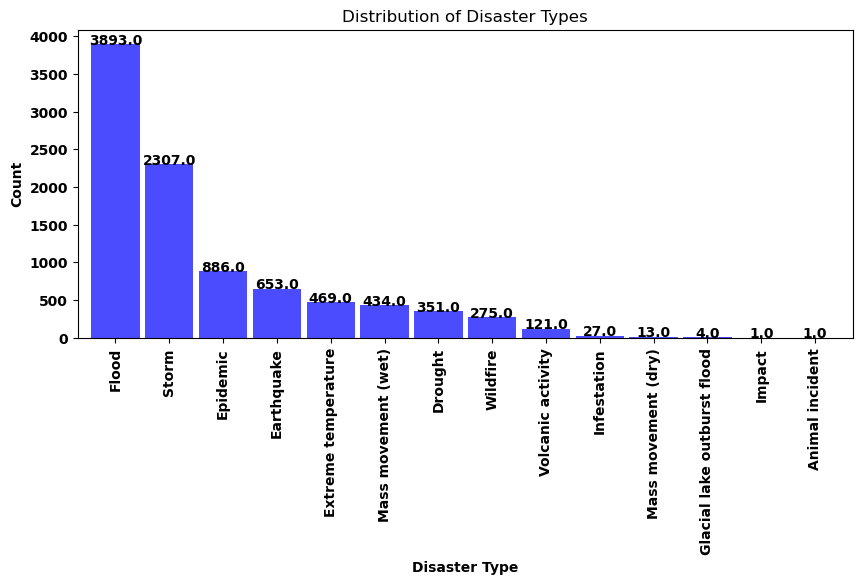

In [32]:
#plotting the distribution of disaster types on a bar chart
plt.figure(figsize=(10,4))
count_disaster_type.plot(kind='bar',color='blue',alpha=0.7,width=0.9)
for i,v in enumerate(count_disaster_type):
    plt.text(i,v,float(v),ha="center")
plt.title('Distribution of Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.savefig("type_distribution.jpg",bbox_inches='tight', dpi=150)
plt.show()


In [14]:
#count of disaster types by region
region_disaster_counts=impact_data_clean.groupby('Region')['disaster_type'].count()
region_disaster_counts

Region
Africa      2065
Americas    2095
Asia        3731
Europe      1189
Oceania      355
Name: disaster_type, dtype: int64

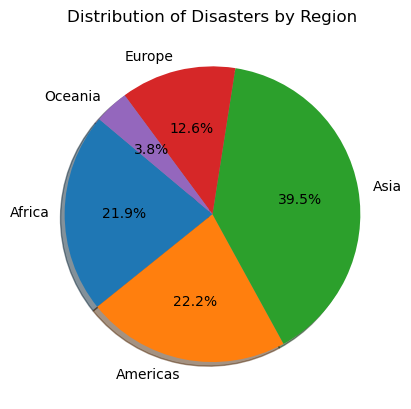

In [15]:
#plotting the distribution of disasters by region on a pie chart
plt.pie(region_disaster_counts,labels=region_disaster_counts.index,autopct='%1.1f%%',startangle=140,shadow='true')
plt.title('Distribution of Disasters by Region')
plt.savefig("region distribution.jpg",bbox_inches='tight', dpi=150)
plt.show()

IMPACT OF VARIOUS NATURAL DISASTER TYPES 

In [16]:
#calculating the average total death as a result of disaster type
average_total_death=impact_data_clean.groupby(['disaster_type'])['total_deaths'].mean()                                                
average_total_death


disaster_type
Animal incident                 12.0000
Drought                         68.1282
Earthquake                    1202.1286
Epidemic                       132.3476
Extreme temperature            501.4222
Flood                           32.8947
Glacial lake outburst flood    109.7500
Impact                           0.0000
Infestation                      0.0000
Mass movement (dry)             29.3846
Mass movement (wet)             44.5207
Storm                           94.6398
Volcanic activity               14.1405
Wildfire                         7.4255
Name: total_deaths, dtype: float64

In [17]:
#calculating the average number injured as a result of  disaster type
average_no_injured=impact_data_clean.groupby(['disaster_type'])['no_injured'].mean()
average_no_injured

disaster_type
Animal incident                  0.0000
Drought                          0.0912
Earthquake                    2504.3859
Epidemic                      3039.9244
Extreme temperature           4400.7569
Flood                           84.7737
Glacial lake outburst flood      6.0000
Impact                        1491.0000
Infestation                      0.0000
Mass movement (dry)              7.0769
Mass movement (wet)             10.2604
Storm                          151.9584
Volcanic activity              131.6777
Wildfire                        51.8073
Name: no_injured, dtype: float64

In [18]:
#Ranking of the impact of disaster types on total_deaths
disaster_on_death=average_total_death.sort_values(ascending=False)
disaster_on_death

disaster_type
Earthquake                    1202.1286
Extreme temperature            501.4222
Epidemic                       132.3476
Glacial lake outburst flood    109.7500
Storm                           94.6398
Drought                         68.1282
Mass movement (wet)             44.5207
Flood                           32.8947
Mass movement (dry)             29.3846
Volcanic activity               14.1405
Animal incident                 12.0000
Wildfire                         7.4255
Impact                           0.0000
Infestation                      0.0000
Name: total_deaths, dtype: float64

In [19]:
#Ranking of the impact of disaster types on no_injured
disaster_no_injured=average_no_injured.sort_values(ascending=False)
disaster_no_injured


disaster_type
Extreme temperature           4400.7569
Epidemic                      3039.9244
Earthquake                    2504.3859
Impact                        1491.0000
Storm                          151.9584
Volcanic activity              131.6777
Flood                           84.7737
Wildfire                        51.8073
Mass movement (wet)             10.2604
Mass movement (dry)              7.0769
Glacial lake outburst flood      6.0000
Drought                          0.0912
Animal incident                  0.0000
Infestation                      0.0000
Name: no_injured, dtype: float64

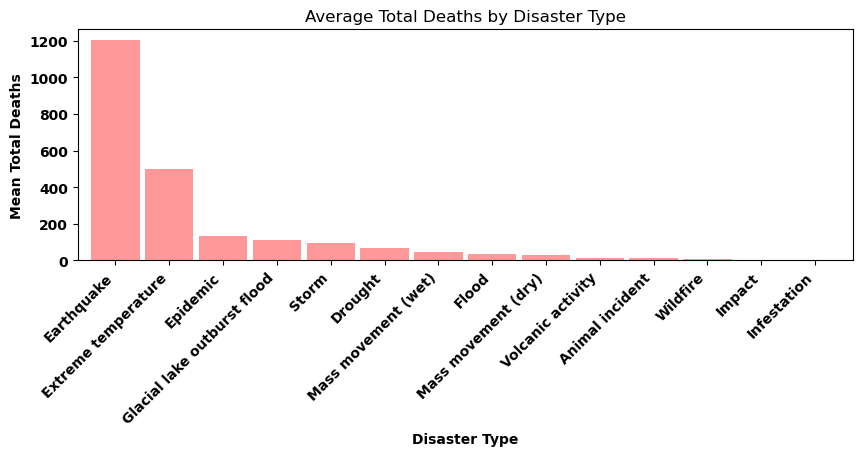

In [27]:
#plotting the ranked average deaths by disaster type
plt.figure(figsize=(10,3))
disaster_on_death.plot(kind='bar',color='red',alpha=0.4, width=0.9,legend=False)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.title('Average Total Deaths by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Mean Total Deaths')
plt.xticks(rotation=45,ha='right')
plt.savefig('average_total_death.jpg',bbox_inches='tight', dpi=150)
plt.show()

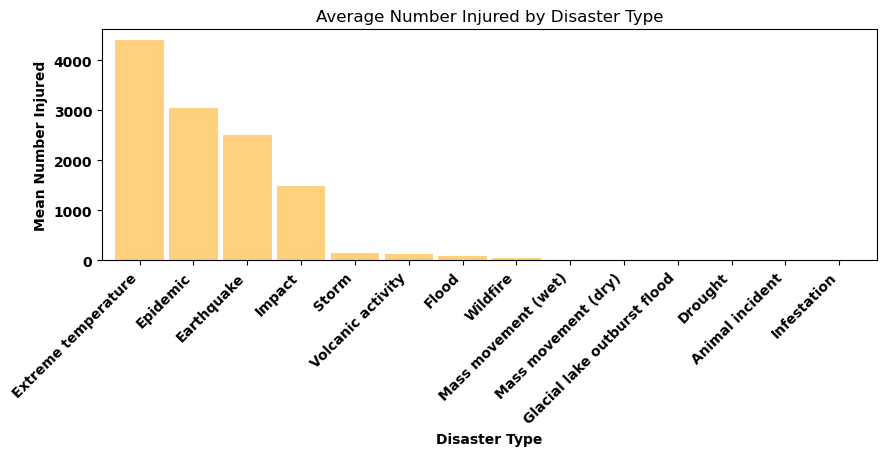

In [28]:
#plotting the ranked averge no_injured by disaster type
plt.figure(figsize=(10,3))
disaster_no_injured.plot(kind='bar',color='orange',alpha=0.5, width=0.9)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.title('Average Number Injured by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Mean Number Injured')
plt.xticks(rotation=45,ha='right')
plt.savefig('average_no_injured.jpg',bbox_inches='tight', dpi=150)
plt.show()


WIDE RANGE IMPACT OF DISASTER TYPES

In [22]:
#Calculating the average total affected
average_total_affected=impact_data_clean.groupby(['disaster_type'])['total_affected'].mean()/1000                                               
average_total_affected

disaster_type
Animal incident                  0.0050
Drought                       4504.3530
Earthquake                     215.0414
Epidemic                        13.5134
Extreme temperature            206.3454
Flood                          458.9879
Glacial lake outburst flood     22.1060
Impact                         301.4910
Infestation                    103.7037
Mass movement (dry)              0.3296
Mass movement (wet)             12.0855
Storm                          353.0323
Volcanic activity               53.0620
Wildfire                        53.4883
Name: total_affected, dtype: float64

In [23]:
#Ranking the average total affected and formatting 
disaster_total_affected=average_total_affected.sort_values(ascending=False)
disaster_total_affected




disaster_type
Drought                       4504.3530
Flood                          458.9879
Storm                          353.0323
Impact                         301.4910
Earthquake                     215.0414
Extreme temperature            206.3454
Infestation                    103.7037
Wildfire                        53.4883
Volcanic activity               53.0620
Glacial lake outburst flood     22.1060
Epidemic                        13.5134
Mass movement (wet)             12.0855
Mass movement (dry)              0.3296
Animal incident                  0.0050
Name: total_affected, dtype: float64

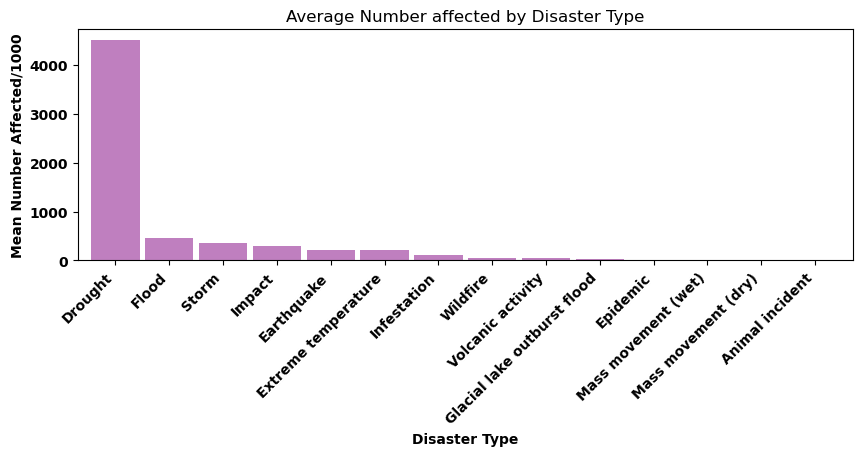

In [29]:
#Plotting the average total affected 
plt.figure(figsize=(10,3))
disaster_total_affected.plot(kind='bar',color='purple',alpha=0.5,width=0.9)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.title('Average Number affected by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Mean Number Affected/1000')
plt.xticks(rotation=45,ha='right')
#plt.yticks([0,100,1000,5000])
#plt.ticklabel_format(style="plain")
plt.savefig('wide_impact.jpg',bbox_inches='tight', dpi=150)
plt.show()

CALCULATING THE IQR FOR IMPACT VARIABLES 

In [21]:
Q1=impact_data_clean['no_injured'].quantile(0.25)
Q3=impact_data_clean['no_injured'].quantile(0.75)
IQR=Q3-Q1
print(f'IQR FOR {"no_injured"}:{IQR}')


IQR FOR no_injured:4.0


In [22]:
Q1=impact_data_clean['total_deaths'].quantile(0.25)
Q3=impact_data_clean['total_deaths'].quantile(0.75)
IQR=Q3-Q1
print(f'IQR FOR {"total_deaths"}:{IQR}')

IQR FOR total_deaths:22.0


In [23]:
Q1=impact_data_clean['total_affected'].quantile(0.25)
Q3=impact_data_clean['total_affected'].quantile(0.75)
IQR=Q3-Q1
print(f'IQR FOR {"total_affected"}:{IQR}')

IQR FOR total_affected:28849.0
